In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [3]:
df=pd.read_csv(file_name)
df.drop(["id", "Unnamed: 0"], axis=1, inplace = True)
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:

df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


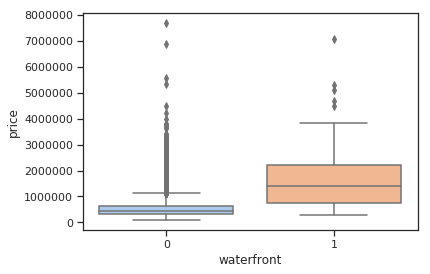

In [19]:
sns.set(style="ticks",palette="pastel")
sns.boxplot(x="waterfront", y="price", data=df)

(0, 8086192.010344663)

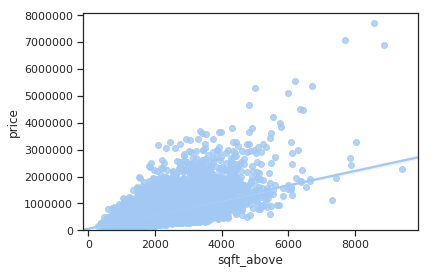

In [20]:
import matplotlib.pyplot as plt
sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)


In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

X = df[['sqft_living']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)

0.49285321790379316

In [24]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
lm = LinearRegression()
X = df[['floors']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)
print('floors-price',lm.score(X,Y))
X = df[['waterfront']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)
print('waterfront-price',lm.score(X,Y))
X = df[['lat']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)
print('lat-price',lm.score(X,Y))
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
print("No of NaN values in bedrooms :", df['bedrooms'].isnull().sum())
X = df[['bedrooms']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)
print('bedrooms-price',lm.score(X,Y))
X = df[['sqft_basement']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)
print('sqft_basement-price',lm.score(X,Y))
X = df[['view']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)
print('view-price',lm.score(X,Y))
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)
print("No of NaN values in bathrooms :", df['bathrooms'].isnull().sum())
X = df[['bathrooms']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)
print('bathrooms-price',lm.score(X,Y))
X = df[['sqft_living15']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)
print('sqft_living15-price',lm.score(X,Y))
X = df[['sqft_above']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)
print('sqft_above-price',lm.score(X,Y))
X = df[['grade']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)
print('grade-price',lm.score(X,Y))
X = df[['sqft_living']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)
print('sqft_living-price',lm.score(X,Y))

floors-price 0.06594310068341092
waterfront-price 0.07095267538578309
lat-price 0.09425113672917484
No of NaN values in bedrooms : 0
bedrooms-price 0.09535546506131365
sqft_basement-price 0.104856815269744
view-price 0.15784211584121544
No of NaN values in bathrooms : 0
bathrooms-price 0.2763999306031437
sqft_living15-price 0.3426684607560172
sqft_above-price 0.3667117528382793
grade-price 0.4454684861092873
sqft_living-price 0.49285321790379316


In [25]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X,Y)
pipe.score(X,Y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.5327430940591443

In [26]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 
X = df[features ]
Y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['floors', 'waterfront','lat','bedrooms','sqft_basement' ,'view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
x_test_pr=pr.fit_transform(x_test[['floors', 'waterfront','lat','bedrooms','sqft_basement' ,'view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
RidgeModel=Ridge(alpha=0.1)

RidgeModel.fit(x_train_pr, y_train)
RidgeModel.score(x_train_pr, y_train)

0.741816743868634

In [16]:
pr=PolynomialFeatures(degree=2)
pr
x_train_pr=pr.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
x_polly=pr.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
RidgeModel=Ridge(alpha=0.1)

RidgeModel.fit(x_train_pr, y_train)

RidgeModel.score(x_train_pr, y_train)


0.741816743868634

In [17]:
x_test_pr=pr.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

x_polly=pr.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

RidgeModel=Ridge(alpha=0.1)

RidgeModel.fit(x_test_pr, y_test)

RidgeModel.score(x_test_pr, y_test)

0.7666545737165752